In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [ ]:
folder_path = '/content/drive/MyDrive/01.School_related/DoAnChuyenNganh/dataset/processed'

# List all files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
dfs = []
labels = []
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    match = re.search(r"processed-(\d+)", file_name)
    label = match.group(1) # label them based on the first number in the file name
    df["label"] = int(label)
    labels.append(label)
    dfs.append(df)
print(len(dfs))
print(len(labels))

6
6


In [ ]:
merged_df = pd.concat(dfs, axis=0, ignore_index=True)
print(merged_df.shape)

(66566, 53)


In [ ]:
from tensorflow.keras.models import load_model
import joblib

In [ ]:
dnn_model = load_model('/content/drive/MyDrive/01.School_related/DoAnChuyenNganh/models/WiCal_DNNR_3.h5')
with open('/content/drive/MyDrive/01.School_related/DoAnChuyenNganh/models/WiCount_RFR_2.pkl', 'rb') as file:
    rfr_model = joblib.load(file)
with open('/content/drive/MyDrive/01.School_related/DoAnChuyenNganh/models/WiCount_LGB_2.pkl', 'rb') as file:
    lgbmr_model = joblib.load(file)


In [ ]:
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 782)               41446     
                                                                 
 dense_6 (Dense)             (None, 440)               344520    
                                                                 
 dropout_2 (Dropout)         (None, 440)               0         
                                                                 
 dense_7 (Dense)             (None, 90)                39690     
                                                                 
 dropout_3 (Dropout)         (None, 90)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                910       
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
X = merged_df.drop("label", axis=1)
y = merged_df["label"]

print("Flattened Features (X):")
print(X.shape)
print("Labels (y):")
print(y.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Flattened Features (X):
(66566, 52)
Labels (y):
(66566,)
(53252, 52)
(53252,)
(13314, 52)
(13314,)


In [ ]:
y_pred = dnn_model.predict(X_test)

 # Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

417/417 [==============================] - 1s 3ms/step
Mean Squared Error: 0.16858302116054308
Mean Absolute Error: 0.23637757815988067


In [ ]:
rfr_y_pred = rfr_model.predict(X_test)

 # Calculate Mean Squared Error
mse = mean_squared_error(y_test, rfr_y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, rfr_y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.15983225927595013
Mean Absolute Error: 0.22580366531470628


In [ ]:
lgbmr_y_pred = lgbmr_model.predict(X_test)

 # Calculate Mean Squared Error
mse = mean_squared_error(y_test, lgbmr_y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, lgbmr_y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.2222234385852217
Mean Absolute Error: 0.28771741168229675


In [ ]:
# Create DataFrame
rfr_df = pd.DataFrame({'y_test': y_test, 'y_pred': rfr_y_pred})

# Display the DataFrame
print(rfr_df)

       y_test  y_pred
18868       1   1.085
40995       3   1.885
19366       1   1.665
17089       1   3.650
43529       4   3.920
...       ...     ...
60765       5   5.000
35100       3   2.815
3118        0   0.005
43434       4   3.950
61836       5   5.000

[13314 rows x 2 columns]


In [ ]:
# Create DataFrame
lgbmr_df = pd.DataFrame({'y_test': y_test, 'y_pred': lgbmr_y_pred})

# Display the DataFrame
print(lgbmr_df)

       y_test    y_pred
18868       1  0.921206
40995       3  1.603269
19366       1  1.534185
17089       1  3.529670
43529       4  4.217574
...       ...       ...
60765       5  4.992439
35100       3  3.089344
3118        0 -0.089698
43434       4  3.961236
61836       5  5.002503

[13314 rows x 2 columns]


In [ ]:
# Flatten y_pred to make it a list of scalars
y_pred_flat = [item for sublist in y_pred for item in sublist]

# Create DataFrame
dnn_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_flat})

# Display the DataFrame
print(df)

       y_test    y_pred
18868       1  1.036301
40995       3  2.197058
19366       1  1.655617
17089       1  2.224916
43529       4  4.121350
...       ...       ...
60765       5  4.873410
35100       3  3.098614
3118        0  0.048901
43434       4  3.870714
61836       5  4.965945

[13314 rows x 2 columns]


In [ ]:
# Group by unique values of y_test and calculate MAE for each group
mae_values = df.groupby('y_test').apply(lambda x: mean_absolute_error(x['y_test'], x['y_pred']))

# Print MAE values
print("Mean Absolute Error (MAE) for each unique y_test value:")
print(mae_values)

Mean Absolute Error (MAE) for each unique y_test value:
y_test
0    0.331020
1    0.252866
2    0.233759
3    0.329442
4    0.179828
5    0.107561
dtype: float64


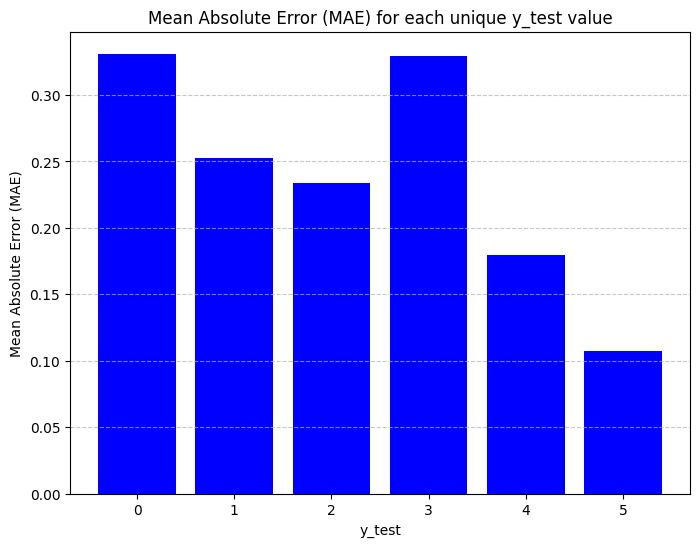

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.bar(mae_values.index.astype(str), mae_values.values, color='blue')
plt.xlabel('y_test')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) for each unique y_test value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.bar(mae_values.index.astype(str), mae_values.values, color='blue')
plt.xlabel('y_test')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) for each unique y_test value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

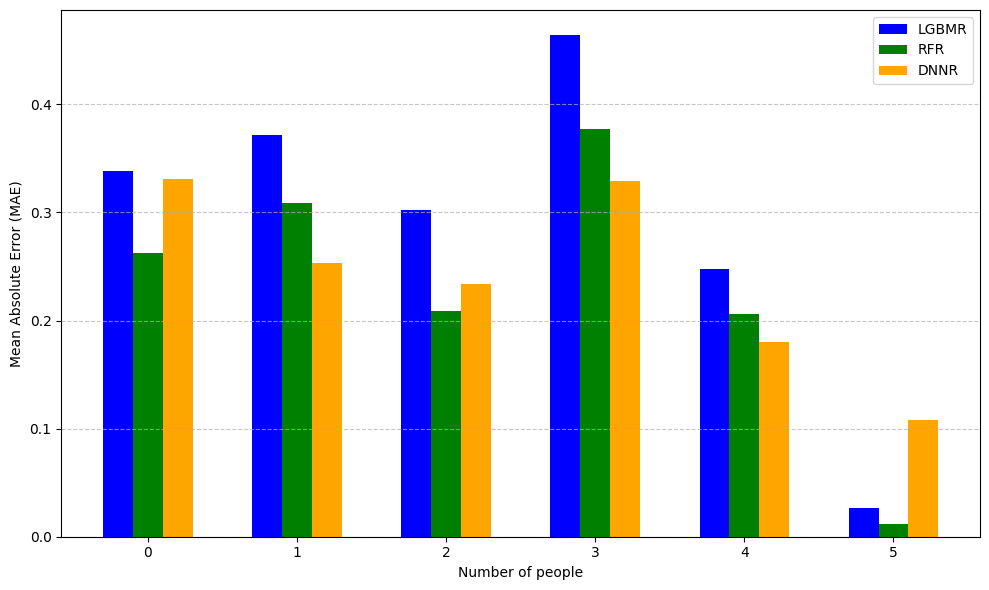

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


# Calculate MAE for each model
def calculate_mae(data):
    mae_values = data.groupby('y_test').apply(lambda x: mean_absolute_error(x['y_test'], x['y_pred']))
    return mae_values

mae_model3 = calculate_mae(dnn_df)
mae_model1 = calculate_mae(lgbmr_df)
mae_model2 = calculate_mae(rfr_df)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting Model 1
plt.bar(mae_model1.index - 0.2, mae_model1.values, width=0.2, color='blue', align='center', label='LGBMR')

# Plotting Model 2
plt.bar(mae_model2.index, mae_model2.values, width=0.2, color='green', align='center', label='RFR')

# Plotting Model 3
plt.bar(mae_model3.index + 0.2, mae_model3.values, width=0.2, color='orange', align='center', label='DNNR')

plt.xlabel('Number of people')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(mae_model1.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
